# Project : Cybersecurity: Suspicious Web Threat Interactions

## This project is analyze web traffic data to identify suspicious patterns, develop features, visualize insights, and build a model for anomaly detection.

### About Dataset
### This dataset contains web traffic records collected through AWS CloudWatch, aimed at detecting suspicious activities and potential attack attempts. The data were generated by monitoring traffic to a production web server, using various detection rules to identify anomalous patterns.

### Context

### In today's cloud environments, cybersecurity is more crucial than ever. The ability to detect and respond to threats in real time can protect organizations from significant consequences. This dataset provides a view of web traffic that has been labeled as suspicious, offering a valuable resource for developers, data scientists, and security experts to enhance threat detection techniques.

### Dataset Content
### Each entry in the dataset represents a stream of traffic to a web server, including the following columns:
### bytes_in: Bytes received by the server.
### bytes_out: Bytes sent from the server.
### creation_time: Timestamp of when the record was created.
### end_time: Timestamp of when the connection ended.
### src_ip: Source IP address.
### src_ip_country_code: Country code of the source IP.
### protocol: Protocol used in the connection.
### response.code: HTTP response code.
### dst_port: Destination port on the server.
### dst_ip: Destination IP address.
### rule_names: Name of the rule that identified the traffic as suspicious.
### observation_name: Observations associated with the traffic.

### source.meta: Metadata related to the source.

### source.name: Name of the traffic source.

### time: Timestamp of the detected event.
### detection_types: Type of detection applied.

### Potential Uses
### This dataset is ideal for:

### ● Anomaly Detection: Developing models to detect unusual behaviors in web traffic.
### ● Classification Models: Training models to automatically classify traffic as normal or suspicious.
### ● Security Analysis: Conducting security analyses to understand the tactics, techniques, and procedures of attackers.

### Import Modules Libraries

In [1]:
import pandas as pd #Data Frames
import numpy as np  #Manipulating Numbers
import matplotlib.pyplot as plt #Visualisation
import seaborn as sns   #Visualisation
from sklearn.ensemble import IsolationForest 
sns.set_style('whitegrid') 
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import IsolationForest

### 1. Load & Explore The Data

In [2]:
# Load the data
data = pd.read_csv(r"C:\Users\thamm\OneDrive\Documents\Internship\Projects\Cybersecurity-Suspicious Web Threat Interactions\CloudWatch_Traffic_Web_Attack.csv")

In [3]:
# Analyze the data
df = pd.DataFrame(data)
df

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,41336,13180,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,136.226.77.103,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
278,3638,3190,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.26.101,DE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
279,25207794,1561220,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
280,5736,12114,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.209.4,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule


In [4]:
#Dimension of data
df.shape

(282, 16)

In [5]:
#Basic information about the data
df.info

<bound method DataFrame.info of      bytes_in  bytes_out         creation_time              end_time  \
0        5602      12990  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
1       30912      18186  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
2       28506      13468  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
3       30546      14278  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
4        6526      13892  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
..        ...        ...                   ...                   ...   
277     41336      13180  2024-04-26T09:50:00Z  2024-04-26T10:00:00Z   
278      3638       3190  2024-04-26T09:50:00Z  2024-04-26T10:00:00Z   
279  25207794    1561220  2024-04-26T09:50:00Z  2024-04-26T10:00:00Z   
280      5736      12114  2024-04-26T09:50:00Z  2024-04-26T10:00:00Z   
281      9032       5862  2024-04-26T09:50:00Z  2024-04-26T10:00:00Z   

              src_ip src_ip_country_code protocol  response.code  dst_port  \
0     147.161.161.82     

In [6]:
#Rows
df.index

RangeIndex(start=0, stop=282, step=1)

In [7]:
#Columns Names
df.columns

Index(['bytes_in', 'bytes_out', 'creation_time', 'end_time', 'src_ip',
       'src_ip_country_code', 'protocol', 'response.code', 'dst_port',
       'dst_ip', 'rule_names', 'observation_name', 'source.meta',
       'source.name', 'time', 'detection_types'],
      dtype='object')

In [8]:
#Head of the data
df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [9]:
#Tail of the data
df.tail()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
277,41336,13180,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,136.226.77.103,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
278,3638,3190,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.26.101,DE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
279,25207794,1561220,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
280,5736,12114,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.209.4,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
281,9032,5862,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,147.161.131.1,AT,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule


In [10]:
#Check for datatypes
df.dtypes

bytes_in                int64
bytes_out               int64
creation_time          object
end_time               object
src_ip                 object
src_ip_country_code    object
protocol               object
response.code           int64
dst_port                int64
dst_ip                 object
rule_names             object
observation_name       object
source.meta            object
source.name            object
time                   object
detection_types        object
dtype: object

## 2. Data Cleaning & Preprocessing

### The dataset contains 282 entries across 16 columns. There are no null values in any of the columns, which is good news for data integrity. However, let's proceed with the following data cleaning tasks: 
### 1. Removing Duplicate Rows : Even though all entries appear non-null, there may still be duplicate entries that should be removed to prevent skewing our analysis.

### The data has been cleaned with the following steps implemented: 
### 1. Duplicate Rows : No duplicate rows were found, so the dataset remains with 282 entries. 
### 2. Data Types : The creation_time, end_time, and time columns have been successfully converted to datetime format, which is more appropriate for any operations involving time. 
### 3. Text Data Standardization : The src_ip_country_code has been standardized to uppercase to ensure consistency across this field.

### Handling Missing Values

In [11]:
#Check for missing values for each column
data.isnull().sum()

bytes_in               0
bytes_out              0
creation_time          0
end_time               0
src_ip                 0
src_ip_country_code    0
protocol               0
response.code          0
dst_port               0
dst_ip                 0
rule_names             0
observation_name       0
source.meta            0
source.name            0
time                   0
detection_types        0
dtype: int64

In [12]:
#Remove duplicates rows
data.drop_duplicates()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,41336,13180,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,136.226.77.103,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
278,3638,3190,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.26.101,DE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
279,25207794,1561220,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
280,5736,12114,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.209.4,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule


In [13]:
# Fill or drop null values
data.dropna()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,41336,13180,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,136.226.77.103,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
278,3638,3190,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.26.101,DE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
279,25207794,1561220,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
280,5736,12114,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.209.4,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule


In [14]:
# Fill in 'bytes_in' with its median if missing.
df['bytes_in'] = df['bytes_in'].fillna(df['bytes_in'].median())
df['bytes_in']

0          5602
1         30912
2         28506
3         30546
4          6526
         ...   
277       41336
278        3638
279    25207794
280        5736
281        9032
Name: bytes_in, Length: 282, dtype: int64

In [15]:
# - Drop rows missing critical information like source or destination IP.
df.dropna(subset=['src_ip', 'dst_ip'], inplace=True)
df['src_ip']

0       147.161.161.82
1         165.225.33.6
2      165.225.212.255
3       136.226.64.114
4       165.225.240.79
            ...       
277     136.226.77.103
278     165.225.26.101
279      155.91.45.242
280      165.225.209.4
281      147.161.131.1
Name: src_ip, Length: 282, dtype: object

In [16]:
df['dst_ip']

0      10.138.69.97
1      10.138.69.97
2      10.138.69.97
3      10.138.69.97
4      10.138.69.97
           ...     
277    10.138.69.97
278    10.138.69.97
279    10.138.69.97
280    10.138.69.97
281    10.138.69.97
Name: dst_ip, Length: 282, dtype: object

### Convert to Date Time Format

In [37]:
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [38]:
df['creation_time']

0     2024-04-25 23:00:00+00:00
1     2024-04-25 23:00:00+00:00
2     2024-04-25 23:00:00+00:00
3     2024-04-25 23:00:00+00:00
4     2024-04-25 23:00:00+00:00
                 ...           
277   2024-04-26 09:50:00+00:00
278   2024-04-26 09:50:00+00:00
279   2024-04-26 09:50:00+00:00
280   2024-04-26 09:50:00+00:00
281   2024-04-26 09:50:00+00:00
Name: creation_time, Length: 282, dtype: datetime64[ns, UTC]

In [39]:
df['end_time']

0     2024-04-25 23:10:00+00:00
1     2024-04-25 23:10:00+00:00
2     2024-04-25 23:10:00+00:00
3     2024-04-25 23:10:00+00:00
4     2024-04-25 23:10:00+00:00
                 ...           
277   2024-04-26 10:00:00+00:00
278   2024-04-26 10:00:00+00:00
279   2024-04-26 10:00:00+00:00
280   2024-04-26 10:00:00+00:00
281   2024-04-26 10:00:00+00:00
Name: end_time, Length: 282, dtype: datetime64[ns, UTC]

In [19]:
df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


## 3.Exploratory Data Analysis (EDA)

### Plot the distribution of bytes_in and bytes_out to explore traffic patterns.

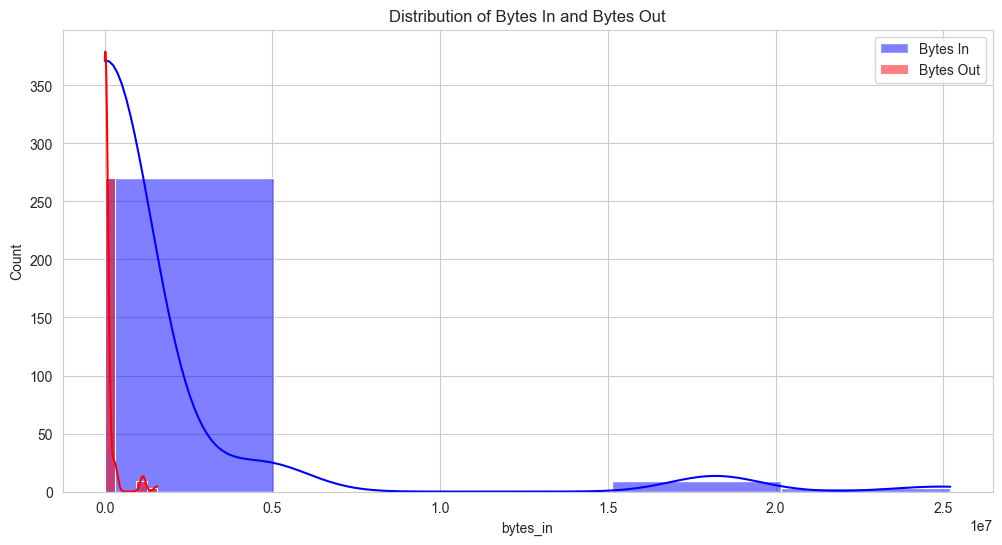

In [58]:
plt.figure(figsize=(12, 6))
sns.histplot(df['bytes_in'], bins=5, color='blue', kde=True,
label='Bytes In')
sns.histplot(df['bytes_out'], bins=5, color='red', kde=True,
label='Bytes Out')
plt.legend()
plt.title('Distribution of Bytes In and Bytes Out')
plt.show()

### Count of protocols used

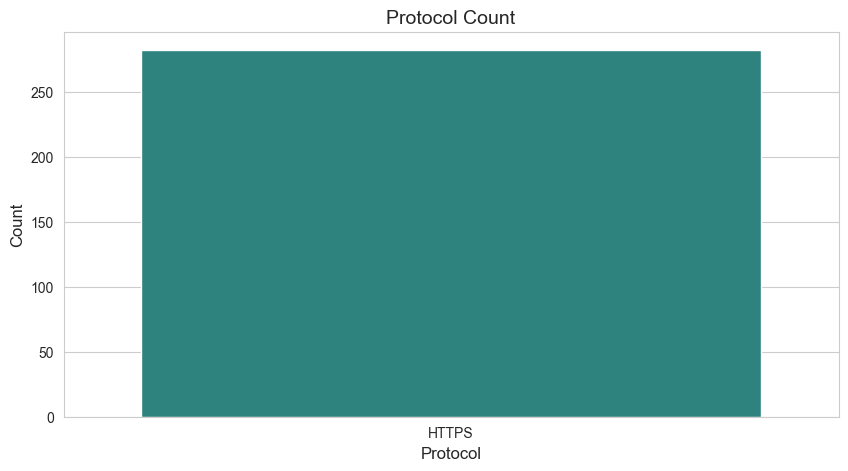

In [62]:
plt.figure(figsize=(10,5))
sns.countplot(x='protocol', data=df, palette='viridis')
plt.title('Protocol Count', fontsize=14)
plt.xlabel('Protocol', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)
plt.show()

## 4. Feature Engineering

### Extract useful features, like duration and average packet size, to aid in analysis.

In [22]:
# Create a new feature: session_duration in seconds.
df['session_duration'] = (df['end_time'] - df['creation_time']).dt.total_seconds()

In [23]:
# Create another feature: average packet size.
# Guard against division by zero by replacing 0 duration with NaN, then filling NaN with 0.
df['avg_packet_size'] = (df['bytes_in'] + df['bytes_out']) / df['session_duration'].replace(0, np.nan)
df['avg_packet_size'] = df['avg_packet_size'].fillna(0)

In [24]:
df[['creation_time', 'end_time', 'session_duration', 'avg_packet_size']].head()

,creation_time,end_time,session_duration,avg_packet_size
0,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,600.0,30.986667
1,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,600.0,81.830000
2,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,600.0,69.956667
3,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,600.0,74.706667
4,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,600.0,34.030000


## 5. Data Visualisation

### Country-based interaction analysis based on source IP country codes.

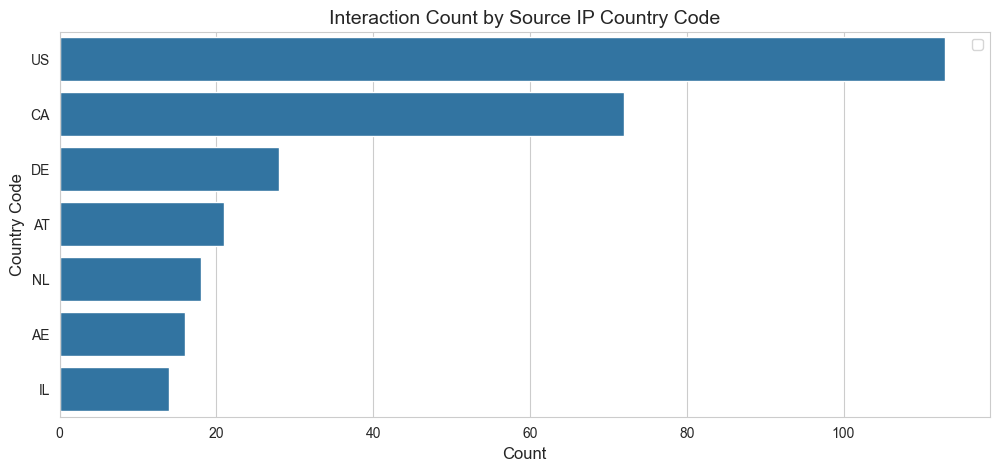

In [25]:
plt.figure(figsize=(12, 5))
sns.countplot(y='src_ip_country_code', data=df, order=df['src_ip_country_code'].value_counts().index)
plt.legend()
plt.title('Interaction Count by Source IP Country Code', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Country Code', fontsize=12)
plt.show()


### Suspicious Activities Based on Ports

In [26]:
# we assume 'detection_types' indicates "Suspicious" traffic.

suspicious_df = df[df['detection_types'].str.contains('Suspicious', na=False)]
if not suspicious_df.empty:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='dst_port', data=suspicious_df, palette='coolwarm')
    plt.title('Suspicious Activities Based on Destination Port')
    plt.xlabel('Destination Port')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.show()
else:
    print("No records with 'Suspicious' in detection_types column found.")


No records with 'Suspicious' in detection_types column found.


## 6. Modeling : Anomaly Detection

### This step uses Isolation Forest, a common technique for detecting anomalies.

In [27]:
# Select features for anomaly detection.
features = df[['bytes_in', 'bytes_out', 'session_duration', 'avg_packet_size']].copy()

In [28]:
# Fill any remaining NaN values in our features set for model stability.
features.fillna(features.mean(), inplace=True)
features

,bytes_in,bytes_out,session_duration,avg_packet_size
0,5602,12990,600.0,30.986667
1,30912,18186,600.0,81.830000
2,28506,13468,600.0,69.956667
3,30546,14278,600.0,74.706667
4,6526,13892,600.0,34.030000
...,...,...,...,...
277,41336,13180,600.0,90.860000
278,3638,3190,600.0,11.380000
279,25207794,1561220,600.0,44615.023333
280,5736,12114,600.0,29.750000


In [29]:
# Initialize the Isolation Forest model.
model = IsolationForest(contamination=0.05, random_state=42)
model

IsolationForest(contamination=0.05, random_state=42)

In [30]:
# Fit and predict anomalies
df['anomaly'] = model.fit_predict(features)
df['anomaly'] = df['anomaly'].apply(lambda x: 'Suspicious' if x == -1 else 'Normal')

In [31]:
df['anomaly'].value_counts()

anomaly
Normal        267
Suspicious     15
Name: count, dtype: int64

In [32]:
suspicious_activities = df[df['anomaly'] == 'Suspicious']
suspicious_activities.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types,session_duration,avg_packet_size,anomaly
36,4190330,283456,2024-04-25 23:30:00+00:00,2024-04-25 23:40:00+00:00,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:30:00Z,waf_rule,600.0,7456.310000,Suspicious
87,1215594,64362,2024-04-26 00:30:00+00:00,2024-04-26 00:40:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T00:30:00Z,waf_rule,600.0,2133.260000,Suspicious
116,4827283,306181,2024-04-26 01:00:00+00:00,2024-04-26 01:10:00+00:00,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T01:00:00Z,waf_rule,600.0,8555.773333,Suspicious
132,1889834,34306,2024-04-26 01:20:00+00:00,2024-04-26 01:30:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T01:20:00Z,waf_rule,600.0,3206.900000,Suspicious
153,4869181,301752,2024-04-26 01:40:00+00:00,2024-04-26 01:50:00+00:00,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T01:40:00Z,waf_rule,600.0,8618.221667,Suspicious


## 7. Visualizing the Anomalies

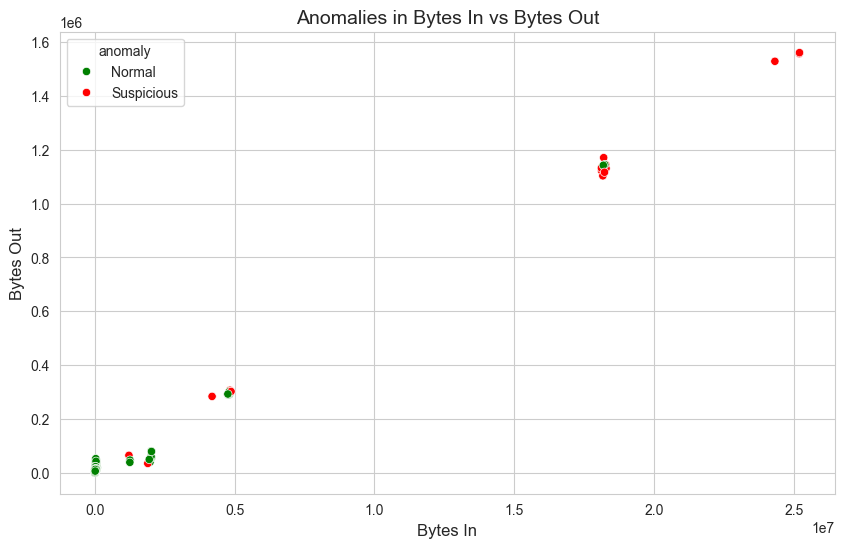

In [33]:
# Visualize the relationship between bytes_in and bytes_out, highlighting anomalies.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bytes_in', y='bytes_out', hue='anomaly', palette={'Normal':'green', 'Suspicious':'red'})
plt.title('Anomalies in Bytes In vs Bytes Out', fontsize=14)
plt.xlabel('Bytes In', fontsize=12)
plt.ylabel('Bytes Out', fontsize=12)
plt.show()

## 8.Report Finding

In [34]:
df[df['anomaly'] == 'Suspicious'].head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types,session_duration,avg_packet_size,anomaly
36,4190330,283456,2024-04-25 23:30:00+00:00,2024-04-25 23:40:00+00:00,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:30:00Z,waf_rule,600.0,7456.310000,Suspicious
87,1215594,64362,2024-04-26 00:30:00+00:00,2024-04-26 00:40:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T00:30:00Z,waf_rule,600.0,2133.260000,Suspicious
116,4827283,306181,2024-04-26 01:00:00+00:00,2024-04-26 01:10:00+00:00,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T01:00:00Z,waf_rule,600.0,8555.773333,Suspicious
132,1889834,34306,2024-04-26 01:20:00+00:00,2024-04-26 01:30:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T01:20:00Z,waf_rule,600.0,3206.900000,Suspicious
153,4869181,301752,2024-04-26 01:40:00+00:00,2024-04-26 01:50:00+00:00,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T01:40:00Z,waf_rule,600.0,8618.221667,Suspicious
